In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Lấy dữ liệu S&P 500 (ký hiệu: ^GSPC)
sp500 = yf.Ticker("^GSPC")

In [49]:
# Lấy dữ liệu lịch sử  trong tháng 3
data = sp500.history(interval="1d", start="2025-03-01", end="2025-03-30")

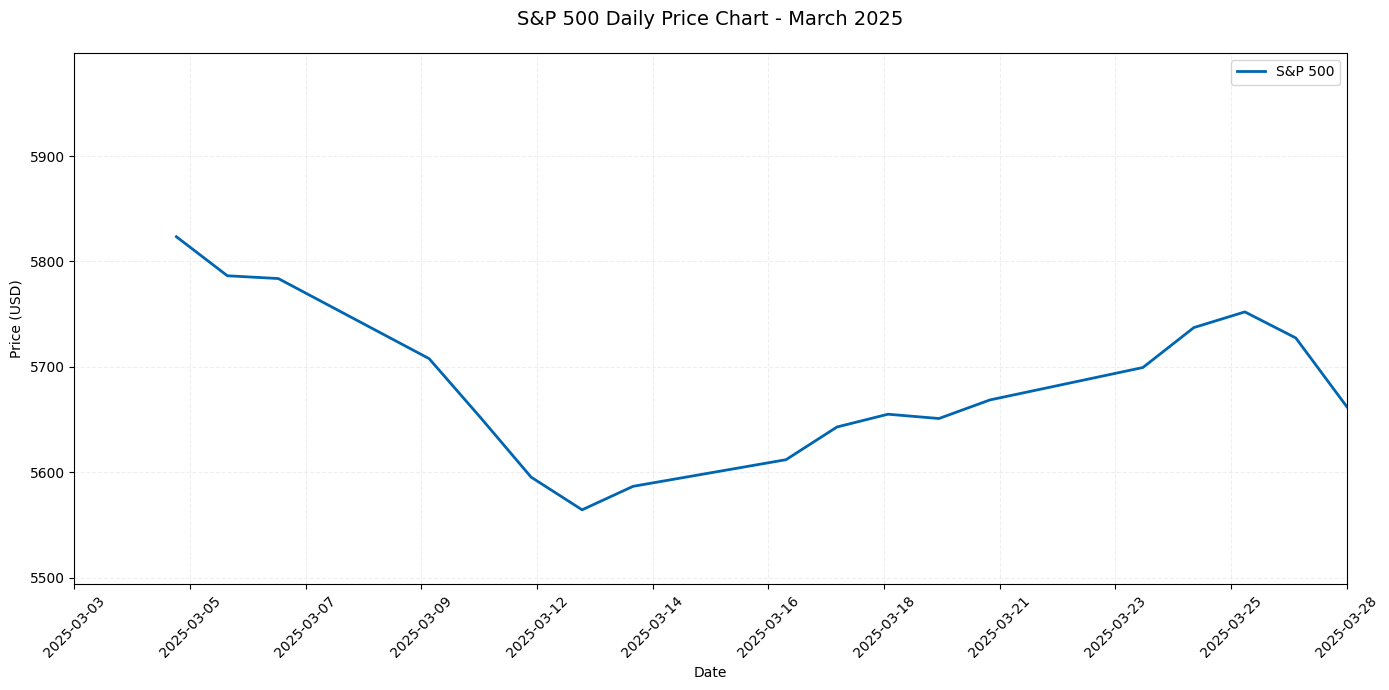

In [54]:
# Create the plot
if 'xticks' not in globals():
	xticks = data.index
plt.figure(figsize=(14, 7))
# Plot the smoothed closing prices using a 3-day rolling mean
plt.plot(data.index, data['Close'].rolling(window=3).mean(), label="S&P 500", color='#0066b2', linewidth=2)

plt.title("S&P 500 Daily Price Chart - March 2025", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Price (USD)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(fontsize=10)

# Format x-axis to use the daily ticks and set limits to the first and last tick
plt.xticks(xticks, [x.strftime('%Y-%m-%d') for x in xticks], rotation=45)
plt.xlim(xticks[0], xticks[-1])

# Apply consistent y-axis scaling
if 'y_min' not in globals():
	y_min = data['Close'].min()
if 'y_max' not in globals():
	y_max = data['Close'].max()
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()
